In [1]:
import warnings
warnings.filterwarnings('ignore')

# MDA

In [2]:
import os
import os.path as op
import xarray as xr
import numpy as np
import pandas as pd
from scipy.io import loadmat

#Plotting libraries
import matplotlib.pyplot as plt
from matplotlib import gridspec
 
#This libraries are imported from mda.py (has to be in the same folder as the notebook)
from mda import MaxDiss_Simplified_NoThreshold, Normalize

### 2D MDA

In [3]:
x = [1, 4, 5, 8, 15, 18, 50, 4, 7, 8, 9, 3, 30]
y = [6, 8, 9, 5, 1, 2, 3, 8, 9, 10, 14, 17, 14]

In [4]:
matrix_mda = np.vstack([x,y]).T
matrix_mda.shape #[Number of points] x [Number of dimensions]

(13, 2)

In [5]:
matrix_mda

array([[ 1,  6],
       [ 4,  8],
       [ 5,  9],
       [ 8,  5],
       [15,  1],
       [18,  2],
       [50,  3],
       [ 4,  8],
       [ 7,  9],
       [ 8, 10],
       [ 9, 14],
       [ 3, 17],
       [30, 14]])

In [6]:
# subset size, scalar and directional indexes
n_subset = 13   # subset size
ix_scalar = [0, 1]        # x,y,z
ix_directional = []      # 

In [7]:
# MDA algorithm
sel = MaxDiss_Simplified_NoThreshold(matrix_mda, n_subset, ix_scalar, ix_directional)


MaxDiss waves parameters: 13 --> 13



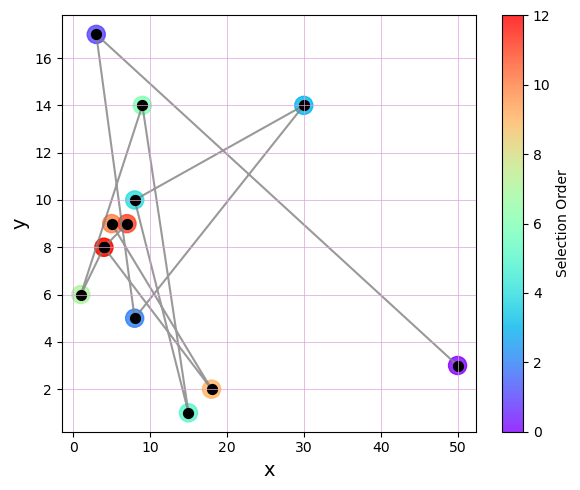

In [8]:
v1, v1_l = x, 'x' # Data, Name
v2, v2_l = y, 'y' # Data, Name

fig = plt.figure(figsize = [6, 5], tight_layout=True)
gs = gridspec.GridSpec(1,1)

ax = fig.add_subplot(gs[0,0])
ax.scatter(v1,v2,c='k', s=50)
ax.set_xlabel(v1_l, fontsize = 14); ax.set_ylabel(v2_l, fontsize = 14)
ax.grid(':', color = 'plum', linewidth = .5)

# Selected points
im = ax.scatter(sel[:,0], sel[:,1], s=170, c=range(len(sel)), cmap='rainbow', alpha=.8, zorder=-1)
ax.plot(sel[:,0], sel[:,1], alpha=.8, zorder=-1, color = 'grey')

plt.colorbar(im).set_label('Selection Order')

### 3D MDA

In [9]:
x = [1, 4, 5, 8, 5, 4, 3]
y = [6, 8, 9, 6, 1, 2, 3]
z = [1, 2, 3, 4, 7, 8, 9]

In [10]:
matrix_mda2 = np.vstack([x,y,z]).T
matrix_mda2.shape #[Number of points] x [Number of dimensions]

(7, 3)

In [11]:
# variables to use
vns = ['x', 'y', 'z']

# subset size, scalar and directional indexes
n_subset = 5      # subset size
ix_scalar = [0, 1, 2]        # x,y,z
ix_directional = []      # 

In [12]:
# MDA algorithm
sel = MaxDiss_Simplified_NoThreshold(matrix_mda2, n_subset, ix_scalar, ix_directional)


MaxDiss waves parameters: 7 --> 5



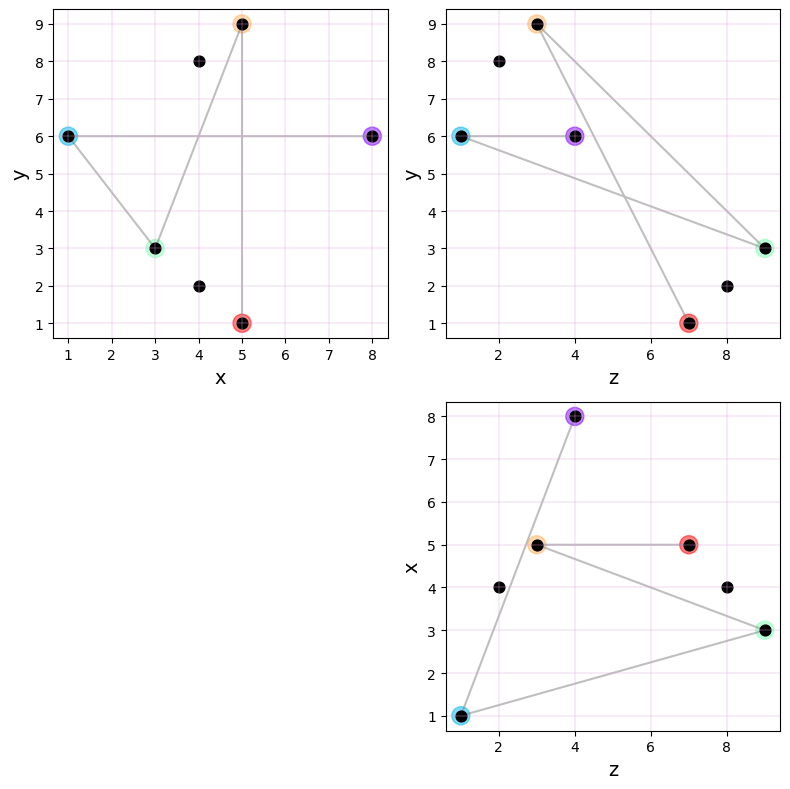

In [13]:
v1, v1_l = x, 'x'
v2, v2_l = y, 'y'
v3, v3_l = z, 'z'

fig = plt.figure(figsize = [8, 8], tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0,0])
ax.scatter(v1,v2,c='k', s=60)
ax.set_xlabel(v1_l, fontsize = 14); ax.set_ylabel(v2_l, fontsize = 14)
ax.grid(':', color = 'plum', linewidth=.3)

ax1 = fig.add_subplot(gs[0,1])
ax1.scatter(v3,v2,c='k', s=60)
ax1.set_xlabel(v3_l, fontsize = 14); ax1.set_ylabel(v2_l, fontsize = 14)
ax1.grid(':', color = 'plum', linewidth=.3)


ax2 = fig.add_subplot(gs[1,1])
ax2.scatter(v3,v1,c='k', s=60)
ax2.set_xlabel(v3_l, fontsize = 14); ax2.set_ylabel(v1_l, fontsize = 14)
ax2.grid(':', color = 'plum', linewidth=.3)


# Selected points
ax.scatter(sel[:,0], sel[:,1], s=170, c=range(len(sel)), alpha=.5, zorder=-1, cmap='rainbow')
ax.plot(sel[:,0], sel[:,1], alpha=.5, zorder=-1, color = 'grey')

ax1.scatter(sel[:,2], sel[:,1], s=170, c=range(len(sel)), alpha=.5, zorder=-1, cmap='rainbow')
ax1.plot(sel[:,2], sel[:,1], alpha=.5, zorder=-1, color = 'grey')

im = ax2.scatter(sel[:,2], sel[:,0], s=170, c=range(len(sel)), alpha=.5, zorder=-1, cmap='rainbow')
ax2.plot(sel[:,2], sel[:,0], alpha=.5, zorder=-1, color = 'grey')


### 3D MDA

#### Points over surface

 $$\textbf{Model: } z = e^{(-(x^2 + y^2))}$$ 
 $$\textbf{with x: } [-2, 2]$$
  $$\textbf{with y: } [-2, 2]$$

In [14]:
n_disc = 500 #Discretizations in x and y axis
xp, yp = np.meshgrid(np.linspace(-2, 2, n_disc), np.linspace(-2, 2,  n_disc)) #Matrix
x, y = xp.reshape(-1), yp.reshape(-1) #Vectors
z = np.exp(-(x**2+y**2))
zp = np.reshape(z, np.shape(xp)) #Matrix

Text(0.5, 0.92, 'Model Surface')

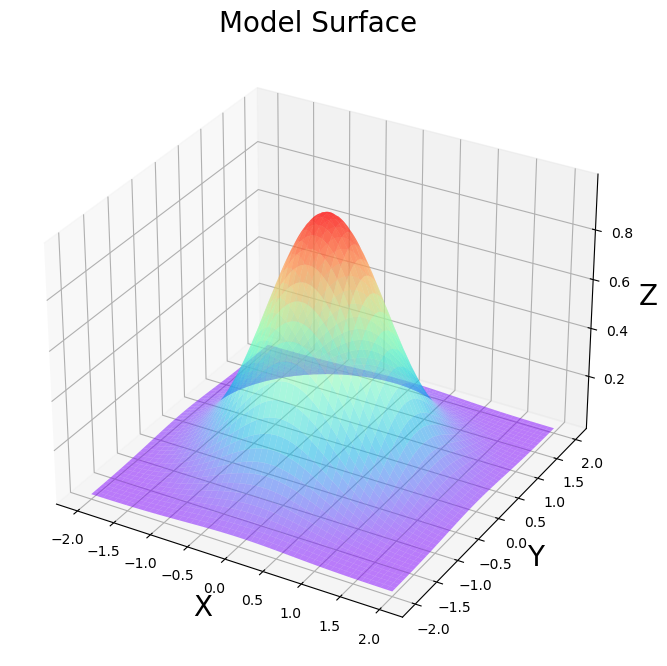

In [15]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

In [16]:
matrix_mda2 = np.vstack([x,y]).T
matrix_mda2.shape #[Number of points] x [Number of dimensions]

(250000, 2)

In [17]:
# subset size, scalar and directional indexes
n_subset = 30         # subset size
ix_scalar = [0, 1]        # x,y,z
ix_directional = []      # 

In [18]:
# MDA algorithm
sel = MaxDiss_Simplified_NoThreshold(matrix_mda2, n_subset, ix_scalar, ix_directional)


MaxDiss waves parameters: 250000 --> 30



Text(0.5, 0.92, 'Selected Points for RBF')

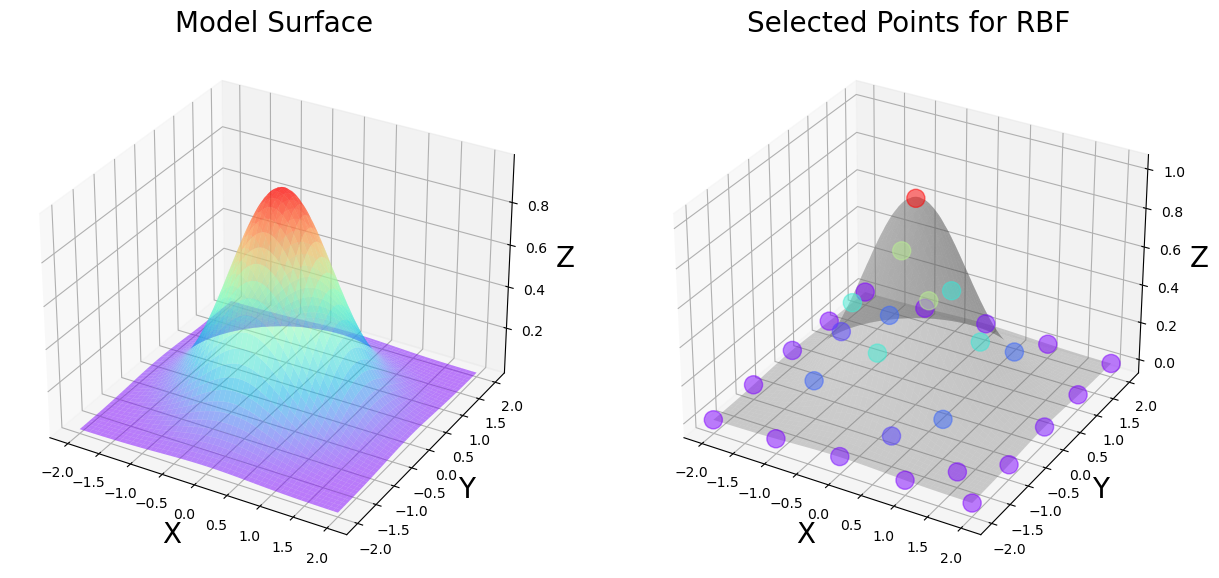

In [19]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xp,yp,zp,alpha=.5, cmap = 'rainbow')
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('Z', fontsize = 20)
ax.set_title('Model Surface', fontsize = 20)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(xp, yp, zp, alpha=.3, color='grey')
im = ax1.scatter(sel[:,0], sel[:,1],np.exp(-(sel[:,0]**2+sel[:,1]**2)), s=170, c=np.exp(-(sel[:,0]**2+sel[:,1]**2)), alpha=.5, zorder=-1, cmap='rainbow')

ax1.set_xlabel('X', fontsize = 20)
ax1.set_ylabel('Y', fontsize = 20)
ax1.set_zlabel('Z', fontsize = 20)
ax1.set_title('Selected Points for RBF', fontsize = 20)


Text(0, 0.5, 'Y')

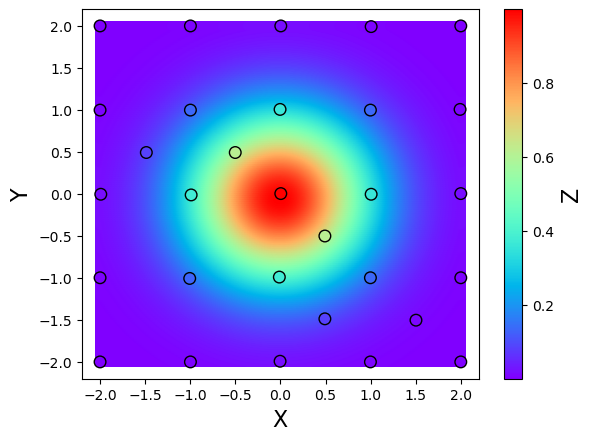

In [20]:
fig, ax = plt.subplots()
im = ax.scatter(x,y, c = z, vmin = z.min(), vmax = z.max(), cmap = 'rainbow')

im = ax.scatter(sel[:,0], sel[:,1], s=70, c=np.exp(-(sel[:,0]**2+sel[:,1]**2)), edgecolor = 'k', cmap='rainbow')

plt.colorbar(im).set_label('Z', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)